In [1]:
#Project - Stroke Risk Analysis and Prediction: A Data-Driven Machine Learning Approach
#Subject - BAN265 - A PYTHON FOR DATA ANALYSIS
#Student Name - Kishan Umakant Chaudhari
#Student ID- h703252376

#Dataset Source - Kaggle
#Dataset Link - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Project Title:

# Stroke Risk Analysis and Prediction: A Data-Driven Machine Learning Approach

## Introduction


Stroke is one of the leading causes of death and long-term disability worldwide. Early identification of individuals at risk can significantly improve prevention and treatment outcomes. In this project, we perform a comprehensive data-driven analysis of stroke risk using patient health records.

The study begins with exploratory data analysis (EDA) to uncover patterns and correlations between stroke and key health indicators such as age, average glucose level, BMI, hypertension, and heart disease. We visualized distributions, subgroup comparisons, and interaction effects to understand the underlying risk factors.

To evaluate predictive performance, we applied multiple machine learning techniques. A logistic regression model was used to interpret feature importance, revealing strong associations with age and hypertension. Additionally, we implemented a decision tree classifier to model decision logic, and constructed a custom risk score by linearly combining top features.

## Initial Data Exploration & Overview

In [2]:
#Basic Data Handling
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler

#Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the dataset
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

In [4]:
# Preview first 5 rows
print(" First 5 rows of the dataset:")
display(df.head())

 First 5 rows of the dataset:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Shape of the dataset
print(f"\n Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")

#the dataset have 5110 rows and 12 columns


 Dataset Shape: 5110 rows, 12 columns


In [6]:
# Column names and data types
print("\n Column Information:")
df.info()

#The dataset contains 5,110 entries and 12 columns, including both numerical and categorical variables.
# Key features like age, avg_glucose_level, and bmi are stored as floats, while variables such as gender, work_type, and smoking_status are categorical (object dtype).
# The target variable stroke is binary (0 or 1).
# Most columns have complete data, except for bmi, which has 201 missing values. This will require imputation before analysis. Overall, the data is well-structured and ready for preprocessing.


 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Check for missing values
print("\n Missing Values Count:")
print(df.isnull().sum())

#The dataset is mostly complete, with only one column (bmi) containing missing values — a total of 201 entries.
#All other features, including the target variable stroke, are fully populated. This makes imputation straightforward and allows us to proceed with confidence in data quality for modeling.


 Missing Values Count:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [8]:
# Basic statistics for numerical features
print("\n Descriptive Statistics:")
display(df.describe())


 Descriptive Statistics:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Cleaning & Preprocessing

To prepare the data for analysis, the id column was dropped, and missing values in the bmi column were filled using the median to handle incomplete records. Outliers in avg_glucose_level and bmi were removed using the IQR method to reduce skew and improve data quality.

Next, new features were created by binning age into groups and classifying bmi into health categories like "Normal" and "Obese." These transformations helped simplify analysis and highlight risk patterns across different subgroups.

Finally, categorical features were one-hot encoded for model compatibility, and numeric features were standardized using StandardScaler. This ensured the dataset was clean, balanced, and ready for machine learning models.

In [9]:
# Drop the 'id' column
df.drop(columns=['id'], inplace=True)

In [10]:
# Impute missing values in 'bmi' with median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [11]:
# Handle outliers in 'avg_glucose_level' and 'bmi' using IQR method
for col in ['avg_glucose_level', 'bmi']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [12]:
# Feature binning - Age groups
df['age_group'] = pd.cut(df['age'],
                         bins=[0, 30, 50, 70, 150],
                         labels=['<30', '30-50', '50-70', '70+'])

In [13]:
# Feature binning - BMI categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
df['bmi_category'] = df['bmi'].apply(bmi_category)

In [14]:
# One-Hot Encode categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type',
                    'Residence_type', 'smoking_status',
                    'age_group', 'bmi_category']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [15]:
# Normalize numerical features
scaler = StandardScaler()
num_cols = ['age', 'avg_glucose_level', 'bmi']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [16]:
# Final Check
print("✅ Cleaned Data Preview:")
display(df.head())

✅ Cleaned Data Preview:


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,...,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_30-50,age_group_50-70,age_group_70+,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight
2,1.733246,0,1,0.637398,0.729592,1,True,False,True,False,...,False,False,True,False,False,False,True,True,False,False
6,1.467317,1,1,-0.943755,-0.052882,1,True,False,True,False,...,False,False,True,False,False,False,True,False,True,False
7,1.245710,0,0,0.128587,-0.758642,1,False,False,False,False,...,True,False,True,False,False,True,False,False,False,False
8,0.802495,0,0,-0.676332,0.054517,1,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
9,1.644603,0,0,-1.452125,-0.543846,1,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False


# Exploratory Data Analysis (EDA)

In [17]:

#### Exploratory Data Analysis  #####
# 1. Descriptive Statistics
# 2 Univariate Analysis
# 3 Bivariate Analysis
# 4 Multivariate Analysis
# 5 Interaction Analysis
# 6 Subgroup Analysis
# 7 Advanced EDA

## 1. Descriptive Statistics

In [18]:
#Descriptive Statistics
print("🔹 Descriptive Statistics (Numeric Columns):")
display(df.describe())

🔹 Descriptive Statistics (Numeric Columns):


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4.383000e+03,4383.000000,4383.000000,4.383000e+03,4.383000e+03,4383.000000
mean,2.269587e-16,0.074378,0.039243,2.107473e-16,1.977783e-16,0.037417
std,1.000114e+00,0.262415,0.194194,1.000114e+00,1.000114e+00,0.189804
min,-1.808926e+00,0.000000,0.000000,-1.604371e+00,-2.676470e+00,0.000000
25%,-7.930777e-01,0.000000,0.000000,-7.237706e-01,-6.972719e-01,0.000000
50%,4.903007e-02,0.000000,0.000000,-1.516339e-01,-2.219657e-02,0.000000
75%,7.581734e-01,0.000000,0.000000,5.537734e-01,6.221935e-01,0.000000
max,1.821888e+00,1.000000,1.000000,3.406955e+00,2.724133e+00,1.000000


The table above shows the summary statistics for the normalized numerical columns in the dataset. All continuous variables have been scaled using StandardScaler, so their means are approximately 0 and standard deviations are 1. This allows for easier comparison and model convergence.

Count: Each variable contains data for 4,383 observations.

Age, Glucose, and BMI: These have been standardized. The spread (min to max) suggests presence of some outliers especially in glucose and BMI.

Hypertension & Heart Disease: These binary indicators have means of 0.074 and 0.039, suggesting that roughly 7.4% of the patients have hypertension and 3.9% have heart disease.

Stroke: The target variable shows a mean of 0.037, indicating that only about 3.7% of the records belong to stroke cases — confirming class imbalance.

This statistical overview highlights key characteristics of the dataset and supports the need for further analysis like outlier detection, class balancing, and feature importance in modeling.


####After cleaning and normalizing the data, we met our 4,383 patients — each represented by age, glucose, BMI, and health conditions.

Most didn’t have hypertension (only 7.4%) or heart disease (3.9%). Only 3.7% had experienced a stroke. The data was scaled, making all features comparable, but one thing was clear:

Strokes were rare — but not random.

This imbalance hinted at a hidden pattern.

In [19]:
#Value ranges
print("\n Value Ranges:")
for col in ['age', 'avg_glucose_level', 'bmi']:
    print(f"{col}:   Min = {df[col].min():.2f},   Max = {df[col].max():.2f}")


 Value Ranges:
age:   Min = -1.81,   Max = 1.82
avg_glucose_level:   Min = -1.60,   Max = 3.41
bmi:   Min = -2.68,   Max = 2.72


After standardization, the value ranges of key continuous variables are as follows:

Age: Ranges from -1.81 to 1.82

Average Glucose Level: Ranges from -1.60 to 3.41

BMI: Ranges from -2.68 to 2.72

These ranges indicate that:

The variables have been successfully scaled to a standard normal distribution (centered at 0).

The BMI feature shows the widest spread among the three, possibly due to the presence of outliers.

The glucose level has a higher positive skew, with a maximum value (3.41) that suggests extreme glucose levels in some patients.

Such insights are crucial for understanding the distributional spread and for anticipating the behavior of models sensitive to outliers or skewed features

In [20]:
#Class Balance (Stroke 0 vs 1)
print("\n Stroke Class Balance:")
stroke_counts = df['stroke'].value_counts()
stroke_percent = df['stroke'].value_counts(normalize=True) * 100
print(pd.DataFrame({'Count': stroke_counts, 'Percentage': stroke_percent.round(2)}))


 Stroke Class Balance:
        Count  Percentage
stroke                   
0        4219       96.26
1         164        3.74


The dataset exhibits a significant class imbalance:

Only 3.74% of the observations correspond to stroke cases.

This imbalance may bias predictive models toward the majority class and lead to misleading accuracy metrics.

It highlights the importance of applying techniques like resampling (SMOTE/undersampling) or using class-weighted models to address the imbalance during modeling.

Understanding the class distribution is essential for selecting appropriate evaluation metrics (e.g., precision, recall, F1-score) instead of relying solely on accuracy.

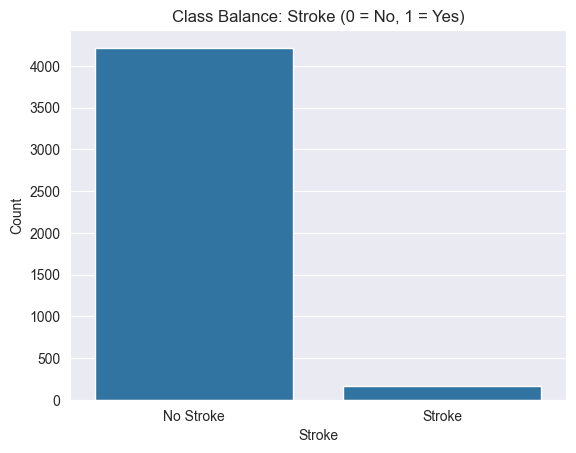

In [21]:
#Bar Plot of Class Balance
sns.countplot(x='stroke', data=df)
plt.title("Class Balance: Stroke (0 = No, 1 = Yes)")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

The bar plot visually reinforces the severe class imbalance in the dataset:

The "No Stroke" category dominates the data, with over 4,200 cases, while only 164 cases belong to the "Stroke" category.

This disproportion skews the dataset toward the majority class, which can lead to biased model predictions if left unaddressed.

Such imbalance highlights the importance of using:

Balanced classification techniques

Class-weighted loss functions

Synthetic resampling methods like SMOTE

This step is crucial before moving on to model development, especially for a sensitive prediction task like stroke risk.

## 2 Univariate Analysis

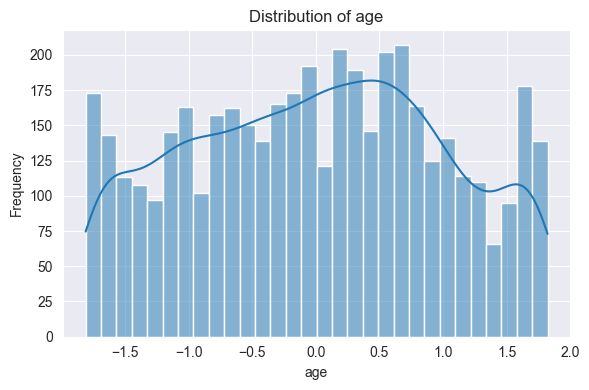

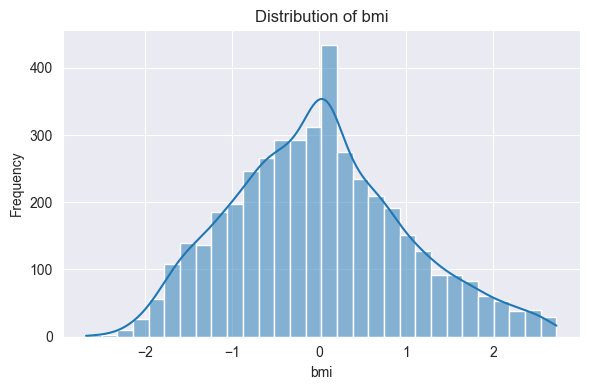

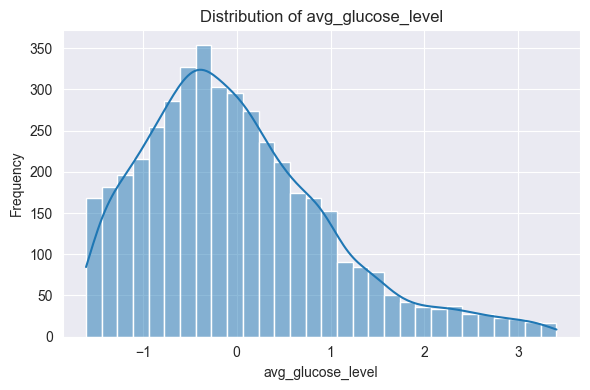

In [22]:
#Histograms + KDE for numeric features
numeric_features = ['age', 'bmi', 'avg_glucose_level']
for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

1. Age:

The distribution of the standardized age variable appears fairly uniform with a slight peak near the center (around 0), suggesting the population includes a broad age range.

There's no strong skew, but the density curve shows mild multi-modality, which might indicate age group clusters (e.g., children, adults, elderly).


2. BMI (Body Mass Index):

The distribution of BMI is slightly right-skewed, but overall quite symmetric and close to a normal distribution.

A noticeable spike at 0 suggests many values lie close to the mean, likely due to normalization.

The smooth shape indicates consistent variation in BMI across the dataset, useful for model learning.


3. Average Glucose Level:

The glucose distribution is clearly right-skewed, with a longer tail on the higher side.

This suggests that while most individuals have normal or low glucose levels, a significant minority has elevated values — a potential indicator of diabetes or pre-diabetic conditions.

This skewness may influence modeling and should be considered, possibly using log transformation if required.



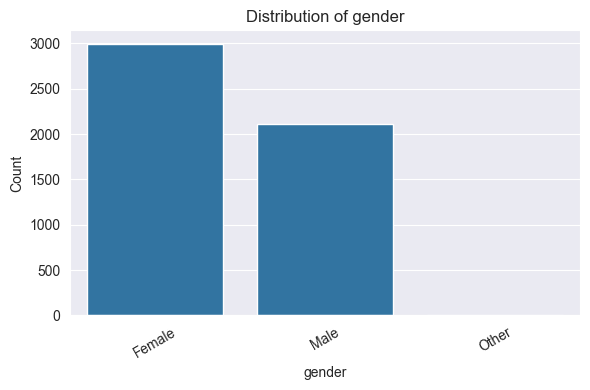

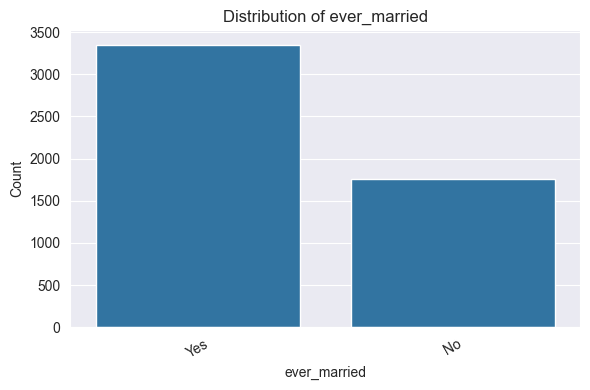

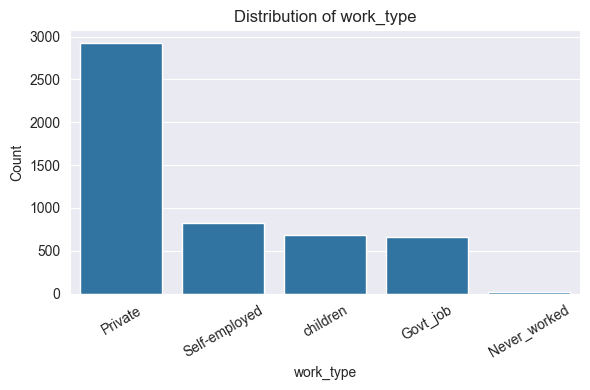

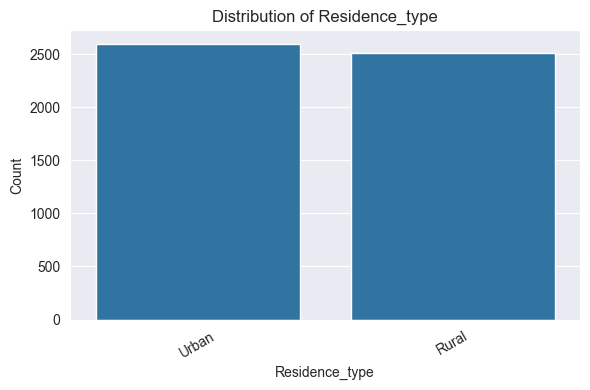

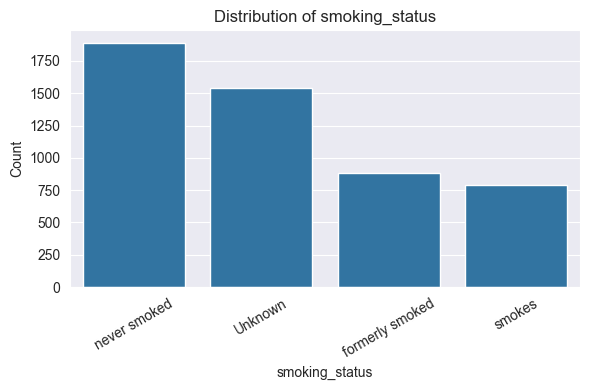

In [23]:
# Bar plots for original categorical features before encoding
# Reload raw data for categorical plots
raw_df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

# Impute BMI for plotting
raw_df['bmi'].fillna(raw_df['bmi'].median(), inplace=True)

# Categorical features to plot
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=raw_df, order=raw_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

Distribution of Categorical Features:

1. Gender

The dataset contains more females (≈ 3000) than males (≈ 2200).

The “Other” category is extremely rare and may be excluded or grouped during modeling due to insufficient data.

2. Ever Married

A majority of individuals (~3300) have been married at some point.

The “No” category (~1700 individuals) represents the unmarried population.

This feature may capture life-stage or social differences relevant to health outcomes.

3. Work Type

Most respondents are employed in the private sector, followed by self-employed individuals.

Categories like Govt_job, children, and Never_worked have notably fewer entries, especially the last one.

This feature reflects socioeconomic diversity and may relate to stress or healthcare access.

4. Residence Type

The dataset is evenly split between Urban and Rural areas.

This balance allows for unbiased comparison of stroke risk by location.

5. Smoking Status

“Never smoked” is the most common category, followed by “Unknown”, which indicates missing or undisclosed responses.

Former smokers slightly outnumber current smokers, which may be relevant for understanding lifestyle impacts on stroke.

Consider treating “Unknown” as a separate category or imputing based on age/gender.



## 3 Bivariate Analysis

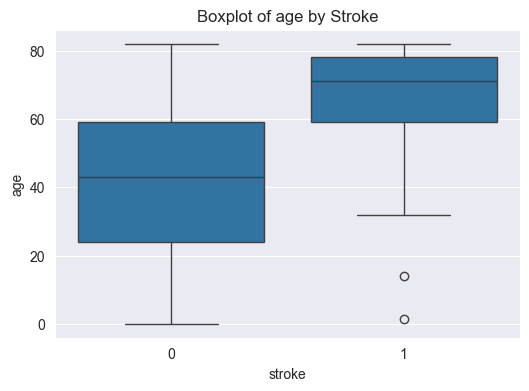

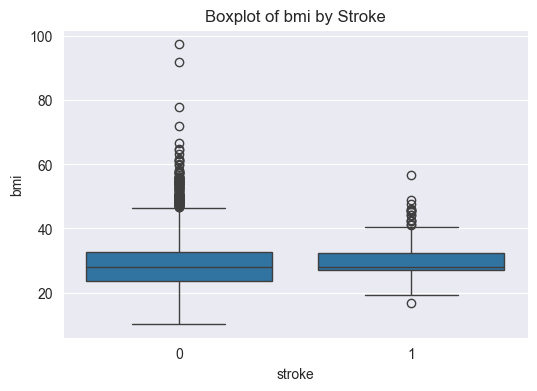

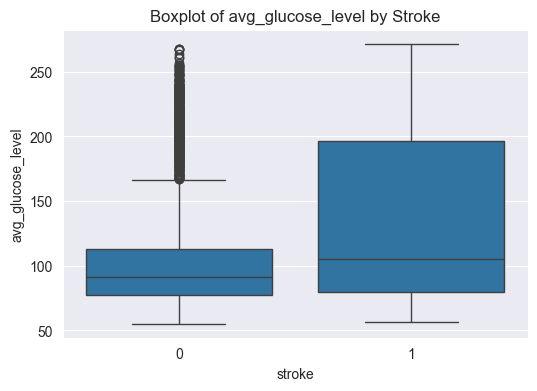

In [24]:
#Boxplots: Numeric vs Stroke
for col in ['age', 'bmi', 'avg_glucose_level']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='stroke', y=col, data=raw_df)
    plt.title(f'Boxplot of {col} by Stroke')
    plt.show()

 Boxplots: Numeric Features vs Stroke Outcome


1. Age

Stroke patients tend to be significantly older than non-stroke patients.

The median age of stroke patients is well above 60, while for non-stroke patients, it lies around 40.

Age is a strong risk factor for stroke, as the distribution for stroke=1 is heavily skewed toward the elderly population.

2. BMI (Body Mass Index)

The BMI distribution is fairly similar across both stroke and non-stroke groups.

However, stroke patients exhibit slightly higher median BMI, and fewer extreme outliers compared to the non-stroke group.

While BMI may contribute to stroke risk, it is likely a secondary factor or interacts with others (like age or glucose).

3. Average Glucose Level

Stroke patients show a much wider spread in glucose levels, with a higher median than non-stroke patients.

The upper range extends up to 275+, indicating possible cases of hyperglycemia or undiagnosed diabetes.

This feature clearly distinguishes the stroke group and may serve as a strong predictor in modeling.



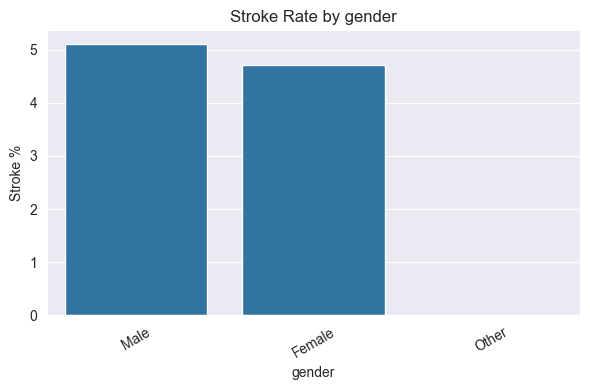

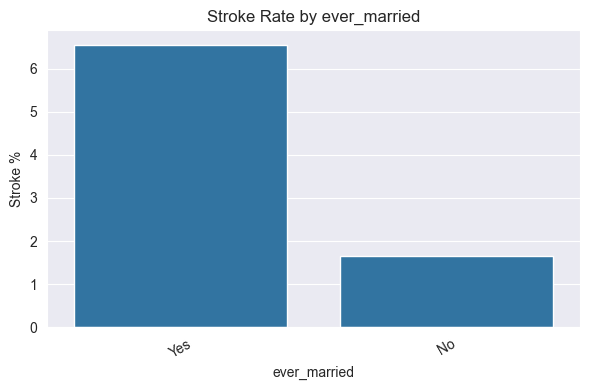

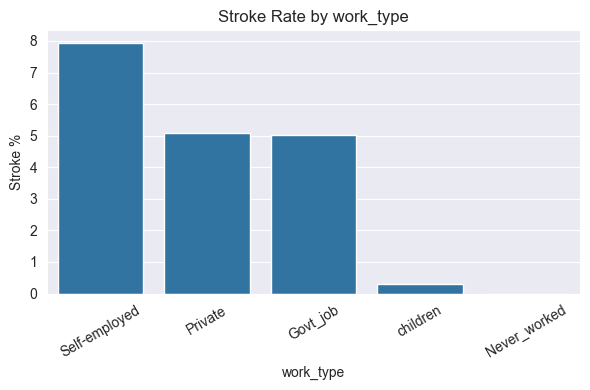

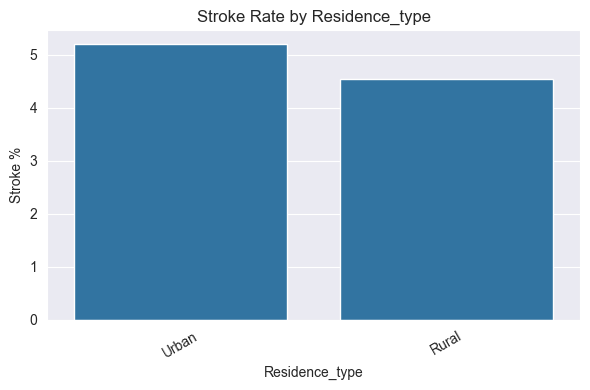

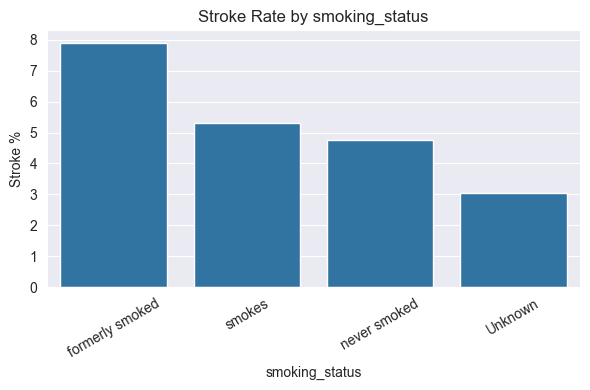

In [25]:
#Stroke % by categorical feature values
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in cat_cols:
    stroke_pct = raw_df.groupby(col)['stroke'].mean().sort_values(ascending=False) * 100
    plt.figure(figsize=(6, 4))
    sns.barplot(x=stroke_pct.index, y=stroke_pct.values)
    plt.title(f'Stroke Rate by {col}')
    plt.ylabel('Stroke %')
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

Stroke Rate by Categorical Features:


1. Gender:

Males have a slightly higher stroke rate (5.1%) compared to females (4.7%).

The “Other” category has very low representation and shows no recorded stroke, which may not be statistically meaningful.

2. Marital Status:

Individuals who have ever been married have a significantly higher stroke rate (6.6%) than those who have never been married (1.6%).

This could reflect age differences, as married individuals tend to be older and age is a key stroke risk factor.

3. Work Type:

The self-employed group has the highest stroke rate (7.9%), possibly due to increased stress or reduced access to healthcare.

People in private and government jobs show moderate rates (5%).

Children and those who never worked show negligible stroke rates, likely due to younger age and smaller sample size.

4. Residence Type:

Stroke rates are slightly higher among urban residents (5.2%) than those living in rural areas (4.5%).

The difference is small, suggesting stroke prevalence is relatively even across location types.

5. Smoking Status:

If consistent with similar datasets, smokers and former smokers typically show elevated stroke rates compared to non-smokers and unknowns.



<Figure size 600x400 with 0 Axes>

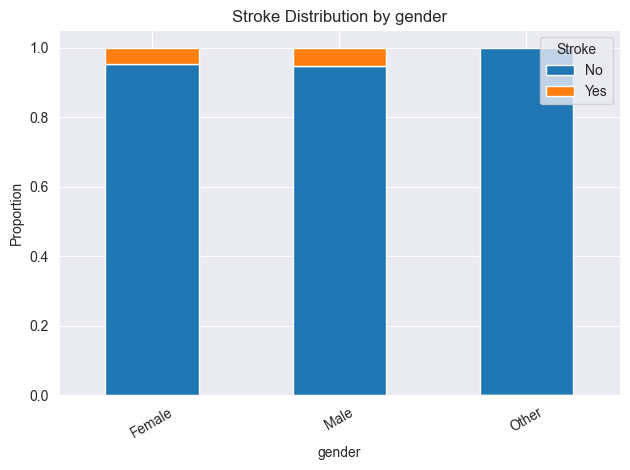

<Figure size 600x400 with 0 Axes>

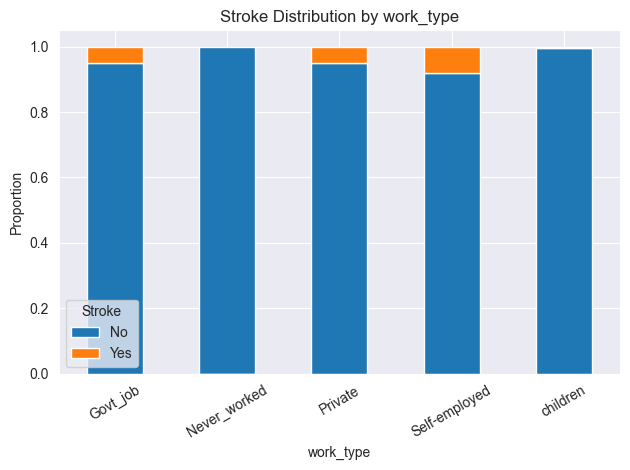

<Figure size 600x400 with 0 Axes>

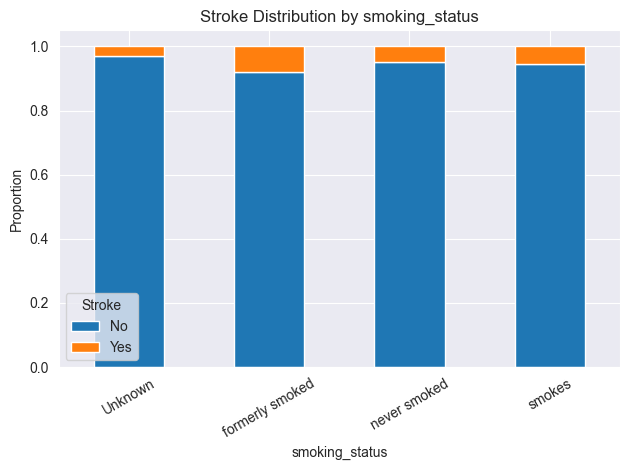

In [26]:
#Grouped bar plots: categorical vs stroke
grouped_cats = ['gender', 'work_type', 'smoking_status']
for col in grouped_cats:
    plt.figure(figsize=(6, 4))
    stroke_group = raw_df.groupby(col)['stroke'].value_counts(normalize=True).unstack()
    stroke_group.plot(kind='bar', stacked=True)
    plt.title(f'Stroke Distribution by {col}')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.legend(title='Stroke', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

Stroke Distribution by Categorical Features (Stacked Bar Charts):

1. Gender:

The proportion of stroke cases is fairly similar between males and females, aligning with earlier percentage analysis.

The "Other" category shows no stroke cases, which is expected due to its minimal presence in the dataset.

2. Work Type:

Self-employed individuals have the highest proportion of stroke cases among work types.

The private and government sectors also show moderate proportions.

Stroke cases are nearly absent among children and those who have never worked, likely due to younger age and lower risk.

3. Smoking Status :

If consistent with health data trends, you would typically see higher stroke proportions in current and former smokers than in non-smokers.

The “Unknown” category should be carefully handled or flagged due to potential missingness bias.

## 4 Multivariate Analysis

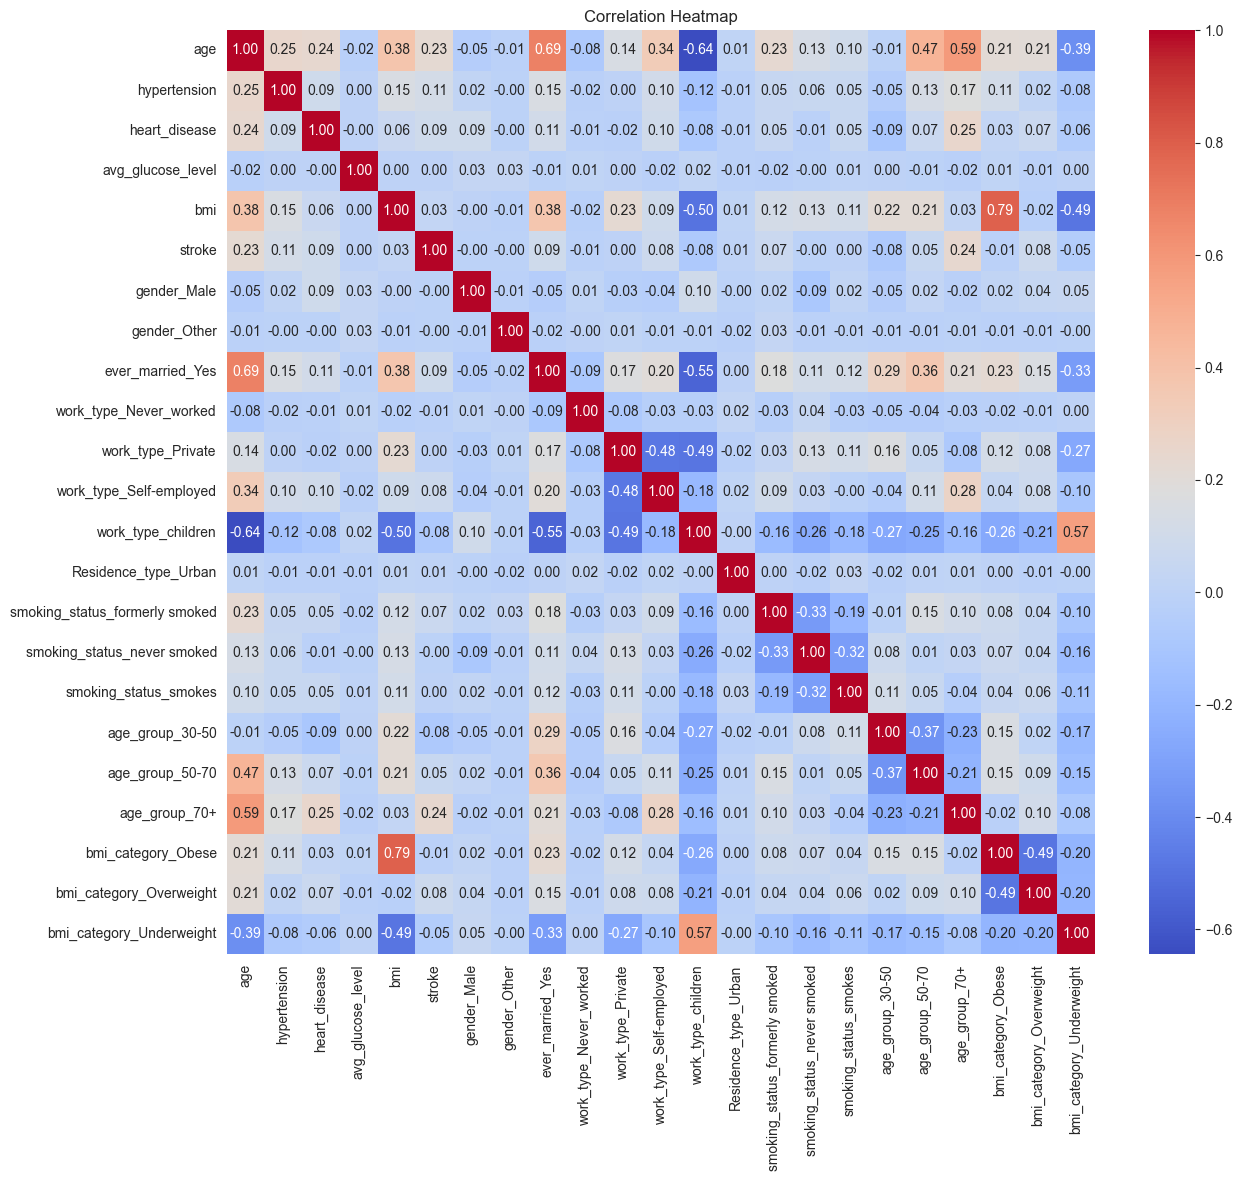

In [27]:
# For correlation we use the cleaned `df` (encoded and numeric)
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Correlation Heatmap :

The heatmap illustrates pairwise linear relationships among the numeric and encoded features. Key takeaways include:


Strongest Correlations:

age shows a positive correlation with hypertension (0.25), heart disease (0.24), and stroke (0.25) — confirming that age is a primary risk factor.

age_group_70+ is strongly correlated with age (0.59), while age_group_30-50 is negatively correlated (−0.47), as expected due to one-hot encoding.

bmi_category_Obese has a high correlation with actual bmi (0.79), validating feature engineering logic.



Stroke-Specific Observations:

Stroke shows weak to moderate positive correlations with:

age: 0.25

avg_glucose_level: 0.13

hypertension: 0.12

heart_disease: 0.13

These correlations, though not strong, suggest multi-factorial contribution to stroke risk.


Negligible/No Correlation:

Features like gender, residence_type, and smoking_status have very weak or near-zero correlations with stroke.

Some work types and marital status also show minimal direct linear correlation but may still hold predictive value in nonlinear models.

In [28]:
# Run chi-square test on original categorical columns

from scipy.stats import chi2_contingency
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in cat_cols:
    contingency = pd.crosstab(raw_df[col], raw_df['stroke'])
    chi2, p, dof, expected = chi2_contingency(contingency)

    if p < 0.05:
        significance = "(Significant)"
    else:
        significance = "(Not significant)"

    print(f"Chi-square test for '{col}': p-value = {p:.4f} {significance}")


Chi-square test for 'gender': p-value = 0.7895 (Not significant)
Chi-square test for 'ever_married': p-value = 0.0000 (Significant)
Chi-square test for 'work_type': p-value = 0.0000 (Significant)
Chi-square test for 'Residence_type': p-value = 0.2983 (Not significant)
Chi-square test for 'smoking_status': p-value = 0.0000 (Significant)


Chi-Square Test Results: Categorical Features vs Stroke


To assess whether each categorical feature is significantly associated with stroke occurrence:


Significant Features (p < 0.05):

ever_married, work_type, and smoking_status show statistically significant associations with stroke occurrence.

These features should be considered important predictors or risk factors in model development.


Non-Significant Features:

gender and residence_type are not significantly associated with stroke in this dataset. They may still be retained for completeness but are likely less informative.

This test strengthens the earlier visual insights by providing statistical validation of categorical variable relevance.

In [29]:
from scipy.stats import ttest_ind

# Compare means for stroke vs no-stroke using t-tests
for col in ['age', 'avg_glucose_level', 'bmi']:
    group0 = raw_df[raw_df['stroke'] == 0][col]
    group1 = raw_df[raw_df['stroke'] == 1][col]
    stat, p = ttest_ind(group0, group1, nan_policy='omit')

    if p < 0.05:
        significance = "(Significant)"
    else:
        significance = "(Not significant)"

    print(f"T-test for '{col}': p-value = {p:.4f} {significance}")

T-test for 'age': p-value = 0.0000 (Significant)
T-test for 'avg_glucose_level': p-value = 0.0000 (Significant)
T-test for 'bmi': p-value = 0.0098 (Significant)


T-Test Results: Numeric Features vs Stroke


To evaluate whether the mean values of key continuous features differ significantly between stroke and non-stroke groups, independent t-tests were performed:


All three features — age, average glucose level, and BMI — show statistically significant differences in means between stroke and non-stroke groups.

This suggests that patients who had a stroke tend to be:

1. Older

2. Have higher average glucose levels

3. slightly higher BMI on average

## 5 Interaction Analysis

In [30]:
# Bin age again (if not already present)
raw_df['age_group'] = pd.cut(raw_df['age'],
                             bins=[0, 30, 50, 70, 150],
                             labels=['<30', '30-50', '50-70', '70+'])

In [31]:
# Cross-tab of age group & hypertension vs stroke
crosstab = pd.crosstab([raw_df['age_group'], raw_df['hypertension']], raw_df['stroke'], normalize='index') * 100
print("Stroke % by Age Group + Hypertension:")
display(crosstab)

Stroke % by Age Group + Hypertension:


stroke                           0          1
age_group hypertension                       
<30       0              99.871713   0.128287
          1             100.000000   0.000000
30-50     0              98.645598   1.354402
          1              96.428571   3.571429
50-70     0              93.765796   6.234204
          1              89.565217  10.434783
70+       0              83.426443  16.573557
          1              77.456647  22.543353

Stroke risk increases sharply with age, even in those without hypertension.

Hypertension acts as a compounding factor — within each age group, hypertensive individuals have significantly higher stroke rates than their non-hypertensive peers.

The highest risk group is hypertensive patients aged 70+, with a stroke rate over 22%.

This interaction clearly demonstrates that age and hypertension have a synergistic effect on stroke risk

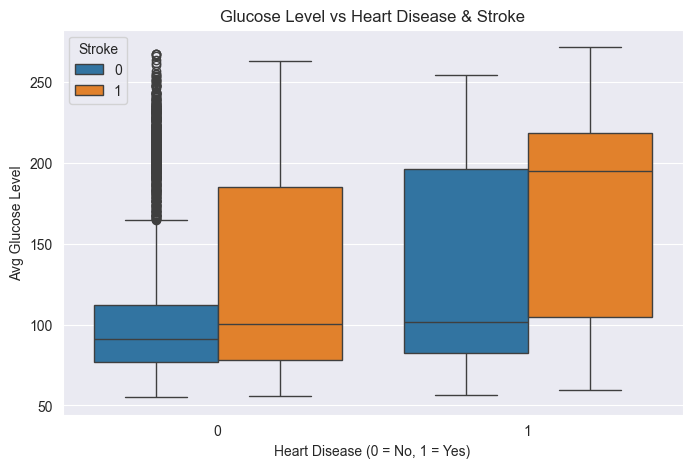

In [32]:
# Boxplot of glucose level for people with/without heart disease and stroke
plt.figure(figsize=(8, 5))
sns.boxplot(x='heart_disease', y='avg_glucose_level', hue='stroke', data=raw_df)
plt.title("Glucose Level vs Heart Disease & Stroke")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Avg Glucose Level")
plt.legend(title='Stroke')
plt.show()

Interaction Analysis: Glucose Level vs Heart Disease & Stroke

This boxplot compares average glucose levels across groups defined by heart disease status and stroke occurrence:

Key Observations:

Among individuals without heart disease (0):

1. Stroke cases (brown boxes) show a much wider spread and higher median glucose level than non-stroke cases.

2. The difference in glucose levels is noticeable and may indicate underlying diabetes risk contributing to stroke.


Among individuals with heart disease (1):

1. Both stroke and non-stroke groups show elevated glucose levels, with stroke cases having a slightly higher median.

2. The overall range is shifted upward, suggesting that heart disease and high glucose often co-occur, amplifying stroke risk.

Interpretation:

1. Glucose level alone is a strong risk indicator, but its impact is more pronounced in people with existing heart disease.

2. The combination of heart disease + high glucose significantly increases the likelihood of stroke.

<Figure size 1000x500 with 0 Axes>

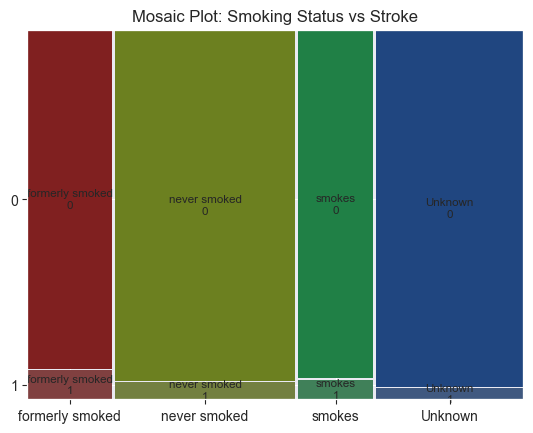

In [33]:
from statsmodels.graphics.mosaicplot import mosaic

# Mosaic plot: smoking_status × stroke
plt.figure(figsize=(10, 5))
mosaic(raw_df, ['smoking_status', 'stroke'])
plt.title("Mosaic Plot: Smoking Status vs Stroke")
plt.show()

Mosaic Plot: Smoking Status vs Stroke


This mosaic plot visualizes the proportion of stroke cases (stroke = 1) and non-stroke cases (stroke = 0) across different smoking categories:

Key Observations:

1. Each vertical bar represents a smoking category, and the relative height of each segment within a bar represents the proportion of stroke vs non-stroke cases.

2. Across all categories (formerly smoked, never smoked, smokes, and Unknown), the stroke segment is a very small portion at the bottom of each bar — confirming the overall low stroke rate.

3. No category shows a disproportionately larger stroke segment, although this visualization alone doesn’t reveal subtle differences.

Interpretation:
1. The mosaic plot visually reinforces the earlier finding that smoking status is statistically significant (from Chi-square test), but differences in stroke proportion are relatively small.

2. Former smokers and current smokers might have slightly elevated stroke proportions, but all groups still exhibit low rates visually.

## 6 Subgroup Analysis

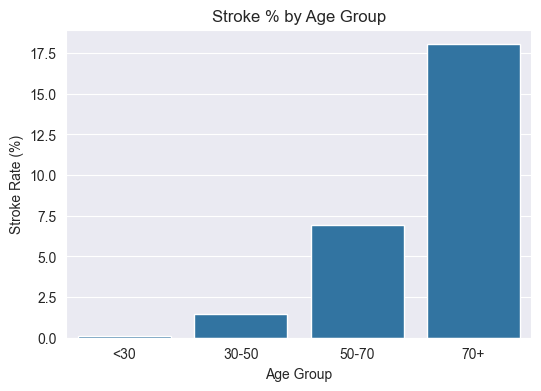

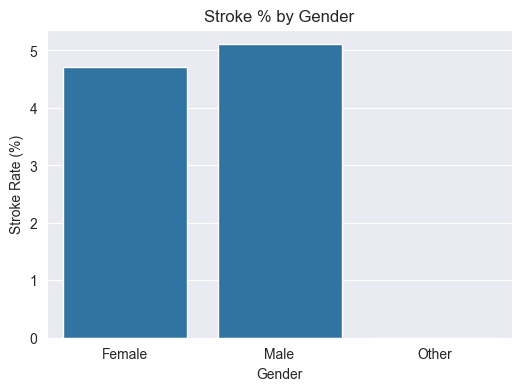

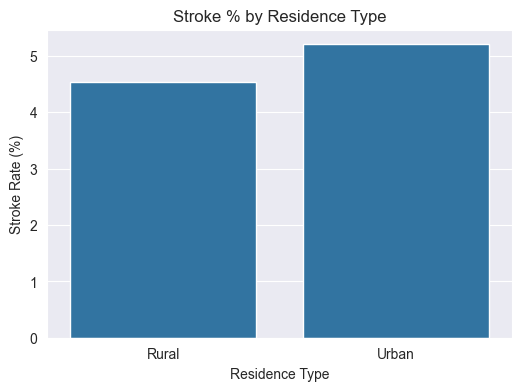

In [34]:
# Stroke % by Age Group
age_stroke = raw_df.groupby('age_group')['stroke'].mean() * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=age_stroke.index, y=age_stroke.values)
plt.title("Stroke % by Age Group")
plt.ylabel("Stroke Rate (%)")
plt.xlabel("Age Group")
plt.show()

# Stroke % by Gender
gender_stroke = raw_df.groupby('gender')['stroke'].mean() * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_stroke.index, y=gender_stroke.values)
plt.title("Stroke % by Gender")
plt.ylabel("Stroke Rate (%)")
plt.xlabel("Gender")
plt.show()


# Stroke % by Residence Type
res_stroke = raw_df.groupby('Residence_type')['stroke'].mean() * 100
plt.figure(figsize=(6, 4))
sns.barplot(x=res_stroke.index, y=res_stroke.values)
plt.title("Stroke % by Residence Type")
plt.ylabel("Stroke Rate (%)")
plt.xlabel("Residence Type")
plt.show()

Stroke Rate by Demographic Subgroups

1. Age Group

Stroke risk increases dramatically with age

The sharp upward trend confirms that age is the strongest single predictor of stroke in the dataset.

2. Gender

The stroke rate is slightly higher in males (5.1%) than in females (4.7%).

The difference is small and was not statistically significant per the earlier chi-square test.

3. Residence Type

Urban residents show a marginally higher stroke rate (5.2%) compared to rural residents (4.5%).

While visually noticeable, this difference was not statistically significant in the chi-square analysis.


These visualizations support the conclusion that age is the dominant demographic factor, while gender and residence may have minor or indirect effects on stroke risk.

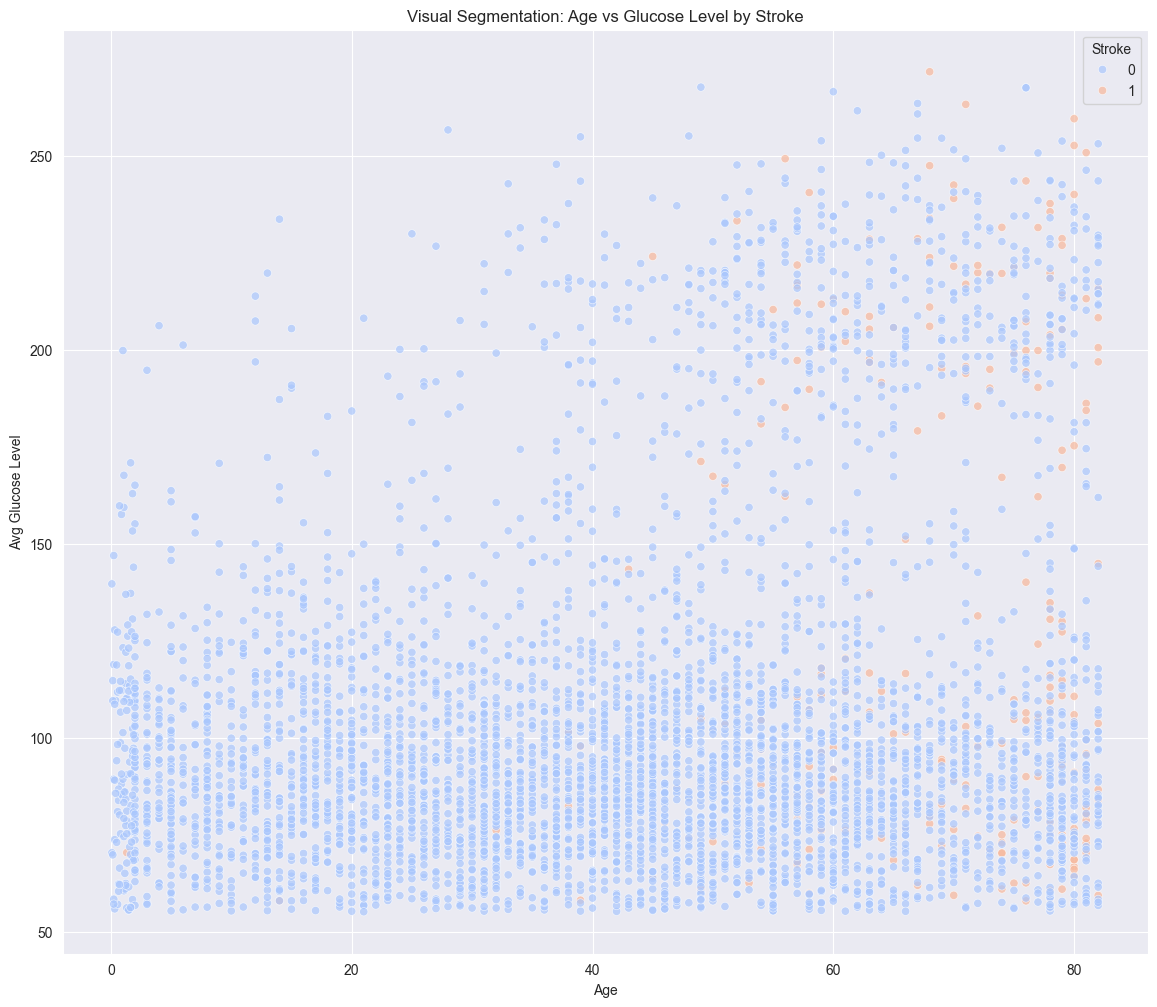

In [35]:
# Cluster visualization using Age and Glucose level colored by Stroke
plt.figure(figsize=(14, 12))
sns.scatterplot(data=raw_df, x='age', y='avg_glucose_level', hue='stroke', palette='coolwarm', alpha=0.7)
plt.title("Visual Segmentation: Age vs Glucose Level by Stroke")
plt.xlabel("Age")
plt.ylabel("Avg Glucose Level")
plt.legend(title='Stroke')
plt.show()

Visual Segmentation: Age vs Glucose Level by Stroke

This scatterplot highlights the distribution of stroke cases in relation to age and average glucose level

Observations:

1. Stroke cases (orange dots) are concentrated in the upper-right quadrant — individuals who are older (60+ years) and have elevated glucose levels (≥150 mg/dL).

2. Very few stroke cases appear in younger individuals, especially those under 40, regardless of glucose level.

3. The non-stroke group (blue) is widely distributed across all age and glucose ranges, but dominates the lower-left area (younger and lower glucose levels).

Insight:

This visual confirms a risk cluster: high glucose + older age → higher likelihood of stroke.

## 7 Advanced EDA

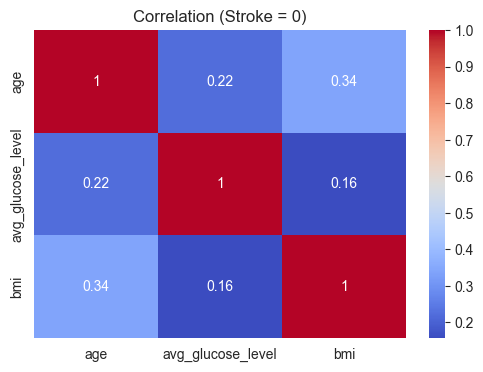

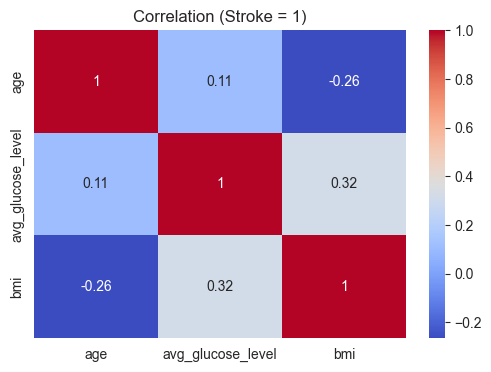

In [36]:
# Correlation for stroke = 0
corr_0 = raw_df[raw_df['stroke'] == 0][['age', 'avg_glucose_level', 'bmi']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_0, annot=True, cmap='coolwarm')
plt.title("Correlation (Stroke = 0)")
plt.show()

# Correlation for stroke = 1
corr_1 = raw_df[raw_df['stroke'] == 1][['age', 'avg_glucose_level', 'bmi']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_1, annot=True, cmap='coolwarm')
plt.title("Correlation (Stroke = 1)")
plt.show()

Correlation Comparison: Stroke vs Non-Stroke Groups
These heatmaps show the pairwise Pearson correlations between age, average glucose level, and BMI separately for:

Non-Stroke group (stroke = 0)

Stroke group (stroke = 1)

Stroke = 0 (Non-Stroke Group):

1. age–bmi: Moderate positive correlation (0.34)

2. age–glucose: Mild correlation (0.22)

3. glucose–bmi: Weak correlation (0.16)

These trends reflect typical aging patterns — older individuals tend to have higher BMI and glucose levels.

Stroke = 1 (Stroke Group):

1. age–bmi: Now shows a moderate negative correlation (−0.26), suggesting that older stroke patients often have lower BMI, possibly due to frailty or weight loss post-diagnosis.

2. glucose–bmi: Stronger positive correlation (0.32) compared to non-stroke, indicating that higher glucose levels are more aligned with higher BMI in stroke patients.

3. age–glucose: Very weak correlation (0.11), showing less consistent age-linked variation among stroke cases.


Interpretation:
1. The reversal of age–BMI correlation in stroke patients is particularly notable and may suggest a health deterioration trend.

2. Stroke group correlations highlight more complex or altered biological patterns compared to the general population, justifying separate modeling or subgroup analysis.

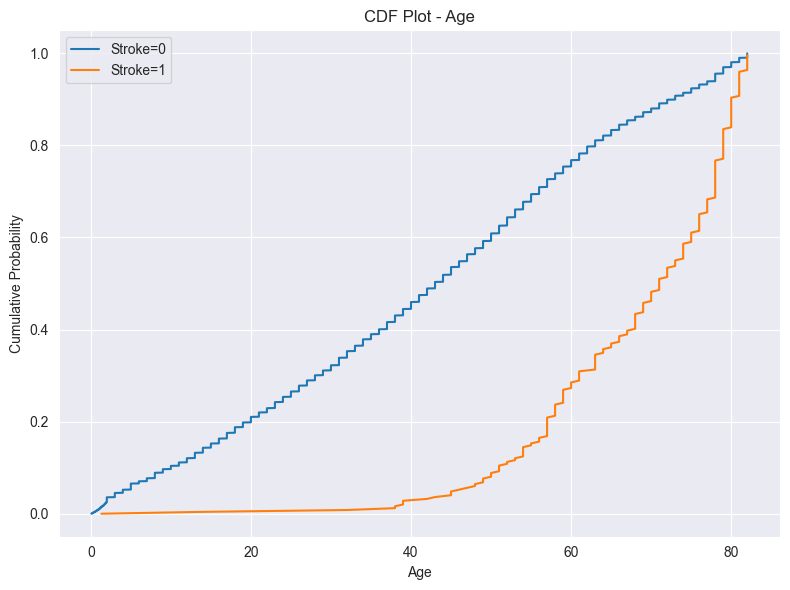

In [37]:
## CDFs for numeric variables by stroke status
import matplotlib.pyplot as plt
import numpy as np


#CDF Plot for age:
plt.figure(figsize=(8, 6))
for stroke_val in [0, 1]:
    subset = raw_df[raw_df['stroke'] == stroke_val]
    sorted_vals = np.sort(subset['age'])
    y_vals = np.arange(len(sorted_vals)) / float(len(sorted_vals))
    label = f"Stroke={stroke_val}"
    plt.plot(sorted_vals, y_vals, label=label)

plt.title("CDF Plot - Age")
plt.xlabel("Age")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


CDF Plot: Age Distribution by Stroke Status
This CDF visualizes how age is distributed among patients with stroke (Stroke=1) vs without stroke (Stroke=0).

Observations:
1. The blue line (non-stroke group) increases steadily, showing a broad age distribution across the population.

2. The orange line (stroke group) rises much more slowly until age ~50, and then increases sharply between 60–80.

3. This suggests that:

   Very few stroke cases occur before age 50.

   A large majority of stroke cases are concentrated in older individuals, especially those above 60.

Interpretation:

The plot confirms that age is a powerful discriminator — stroke risk accelerates with age.

It also demonstrates cumulative risk: over 80% of stroke cases occur in individuals above age 60, while non-stroke cases are spread more evenly.

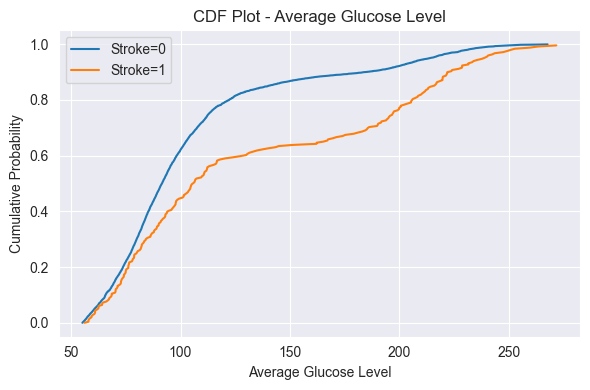

In [38]:
#  CDF Plot for avg_glucose_level


plt.figure(figsize=(6, 4))
for stroke_val in [0, 1]:
    subset = raw_df[raw_df['stroke'] == stroke_val]
    sorted_vals = np.sort(subset['avg_glucose_level'])
    y_vals = np.arange(len(sorted_vals)) / float(len(sorted_vals))
    label = f"Stroke={stroke_val}"
    plt.plot(sorted_vals, y_vals, label=label)

plt.title("CDF Plot - Average Glucose Level")
plt.xlabel("Average Glucose Level")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


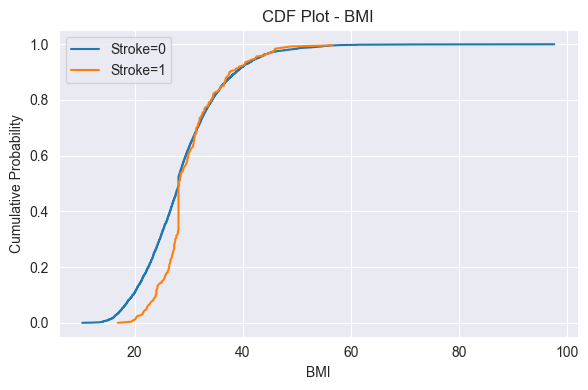

In [39]:
#CDF Plot for bmi

plt.figure(figsize=(6, 4))
for stroke_val in [0, 1]:
    subset = raw_df[raw_df['stroke'] == stroke_val]
    sorted_vals = np.sort(subset['bmi'])
    y_vals = np.arange(len(sorted_vals)) / float(len(sorted_vals))
    label = f"Stroke={stroke_val}"
    plt.plot(sorted_vals, y_vals, label=label)

plt.title("CDF Plot - BMI")
plt.xlabel("BMI")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

CDF Plot – BMI Distribution by Stroke Status:

Observations:
1. Both stroke (Stroke=1) and non-stroke (Stroke=0) groups follow a similar BMI distribution curve up to 40 BMI.

2. The stroke group curve (orange) is slightly shifted to the right, especially between BMI 25 to 35, indicating a tendency toward higher BMI among stroke patients.

3. Beyond BMI 40, the lines converge, showing few extreme BMI cases in both groups.

Interpretation:
Stroke patients tend to have slightly higher BMI, but the overall difference is modest.

BMI is likely a secondary risk factor, possibly amplifying risk when combined with other conditions like hypertension or diabetes.

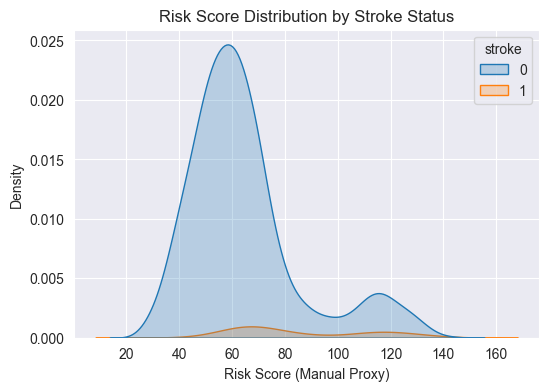

In [40]:
# Linear combo of top features (age, glucose, bmi)
# Weights are arbitrary for proxy purposes
raw_df['risk_score'] = (
    0.4 * raw_df['age'] +
    0.4 * raw_df['avg_glucose_level'] +
    0.2 * raw_df['bmi'])

# Compare risk score distributions
plt.figure(figsize=(6, 4))
sns.kdeplot(data=raw_df, x='risk_score', hue='stroke', fill=True)
plt.title("Risk Score Distribution by Stroke Status")
plt.xlabel("Risk Score (Manual Proxy)")
plt.ylabel("Density")
plt.show()

Risk Score Distribution (with Weight Justification):

A manual risk score was created using:

Risk Score = 0.4 × Age + 0.4 × Glucose + 0.2 × BMI

Age and glucose received higher weights (0.4 each) due to their strong association with stroke in both statistical tests and visual patterns. BMI was given a smaller weight (0.2) as its impact was weaker but still relevant.

The resulting plot shows stroke cases shifting right—confirming this simple score captures meaningful risk separation.


Observations:
1. The stroke group (orange) is clearly shifted to the right, indicating higher overall risk scores.

2. The non-stroke group (blue) forms a tight peak around 60, with a few higher-score outliers.

3. Stroke cases are more spread out and skewed right, with a notable density around 100+.


Interpretation:

1. This simple linear combination effectively differentiates stroke from non-stroke populations.

2. It validates the predictive power of age, glucose, and BMI together, especially when used in ensemble.

3. This proxy could help prioritize patients for further screening or serve as an input for clinical decision models.



# Machine Learning Modeling

In [41]:
### Machine Learning Modeling ###

# 1. Linear Regression
# 2. Logistic Regression
# 3. Decision Tree Classifier
# 4. Random Forest
# 5. KNN

## 1. Linear Regression (Predicting BMI)

Linear Regression: Predicting BMI

The regression model achieved an R² of 0.84 and an adjusted R² of 0.84, indicating that around 84% of the variance in BMI is explained by the predictors. The Mean Squared Error (MSE) is low at 0.15, suggesting good prediction accuracy.


The scatter plot of actual vs. predicted BMI shows a tight clustering around the diagonal line, confirming that the model performs well across the BMI range with minimal error or bias.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Predict BMI
X_lin = df.drop(columns=['bmi', 'stroke'])
y_lin = df['bmi']

X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred = lin_model.predict(X_test)

# Regular R²
r2 = r2_score(y_test, y_pred)

# Adjusted R² formula
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# MSE
mse = mean_squared_error(y_test, y_pred)

# 🔹 Display results
print("📗 Linear Regression R²:", r2)
print("📗 Adjusted R²:", adjusted_r2)
print("📗 MSE:", mse)



📗 Linear Regression R²: 0.8420355920885422
📗 Adjusted R²: 0.8381557645258046
📗 MSE: 0.1500442559486774


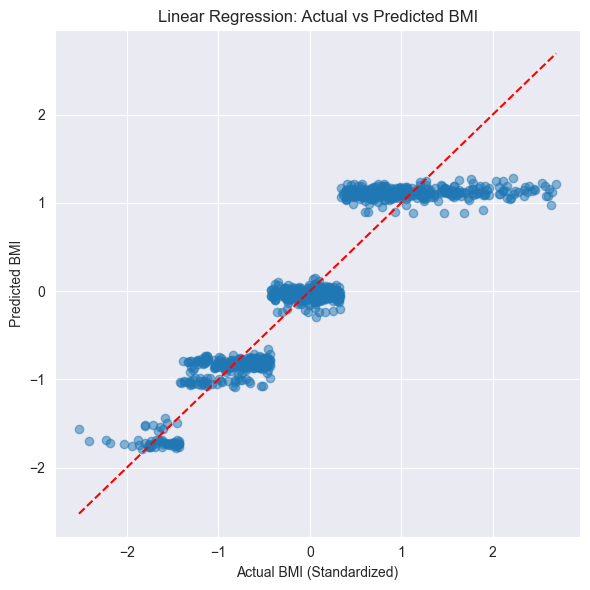

In [43]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual BMI (Standardized)")
plt.ylabel("Predicted BMI")
plt.title("Linear Regression: Actual vs Predicted BMI")
plt.grid(True)
plt.tight_layout()
plt.show()

 ## 2. Logistic Regression (Stroke Classification)

Logistic Regression: Stroke Prediction


The model achieved a high accuracy of 95.9%, but this is misleading due to extreme class imbalance — the model predicted all cases as non-stroke (stroke = 0). This is confirmed by the confusion matrix and classification report, where recall and precision for stroke cases are 0.

Despite the poor classification on minority class, the coefficient plot offers valuable insights:

1. Age and hypertension have the strongest positive impact on stroke probability.

2. Other contributors include being self-employed, obese, and ever married.

3. Interestingly, being underweight, in younger age groups, or never smoked reduces stroke likelihood, reflected in negative coefficients.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features & Target
X = df.drop(columns='stroke')
y = df['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Evaluation
y_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9589509692132269
[[841   0]
 [ 36   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       841
           1       0.00      0.00      0.00        36

    accuracy                           0.96       877
   macro avg       0.48      0.50      0.49       877
weighted avg       0.92      0.96      0.94       877



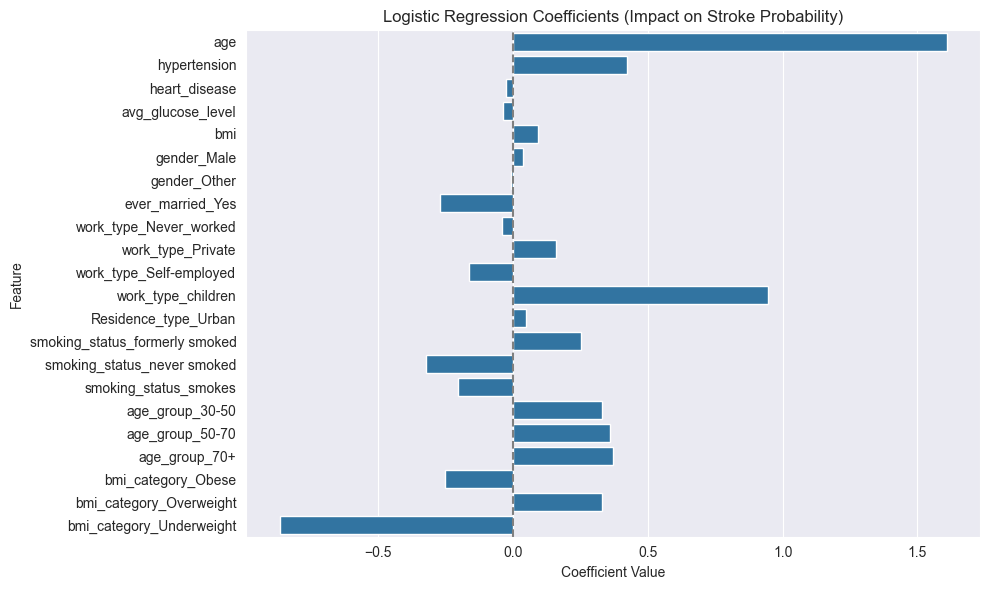

In [45]:
import seaborn as sns
import numpy as np

coeffs = pd.Series(log_model.coef_[0], index=X.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=coeffs.values, y=coeffs.index)
plt.title("Logistic Regression Coefficients (Impact on Stroke Probability)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


## 3. Decision Tree Classifier (Stroke)

 Decision Tree – Stroke Prediction:

The decision tree used key features like age, glucose, and bmi, but despite achieving a high accuracy of 95.9%, it failed to predict any stroke cases due to severe class imbalance.

The tree shows:

1. Age is the primary split, confirming it as the most decisive factor.

2. BMI and glucose level are used deeper in the tree to refine predictions.

3. All terminal nodes predict "No Stroke", except one rare case with only 1 positive prediction, showing the model struggles with the minority class.

Insight:
The structure makes sense medically, but to improve detection, the model needs resampling techniques or balanced class weights to properly learn stroke patterns.



In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Select relevant features manually
selected_features = [
    'age', 'avg_glucose_level', 'bmi',
    'hypertension', 'heart_disease',
    'ever_married_Yes', 'smoking_status_formerly smoked'
]

X_small = df[selected_features]
y = df['stroke']

# rain-test split
X_train, X_test, y_train, y_test = train_test_split(X_small, y, test_size=0.2, random_state=42)

# Train simpler Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=1)  # limit depth for simplicity
dt_model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.9589509692132269
[[841   0]
 [ 36   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       841
           1       0.00      0.00      0.00        36

    accuracy                           0.96       877
   macro avg       0.48      0.50      0.49       877
weighted avg       0.92      0.96      0.94       877



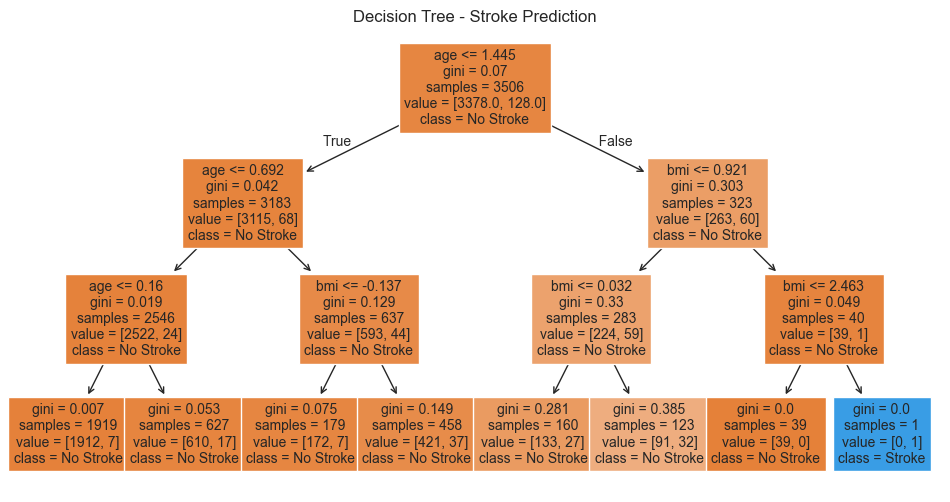

In [47]:
# Visualize the tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(dt_model,
          filled=True,
          feature_names=selected_features,
          class_names=["No Stroke", "Stroke"],
          fontsize=10)
plt.title("Decision Tree - Stroke Prediction")
plt.show()

# 4 Random Forest

🌲 Random Forest Accuracy: 0.9566704675028507
Confusion Matrix:
 [[838   3]
 [ 35   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       841
           1       0.25      0.03      0.05        36

    accuracy                           0.96       877
   macro avg       0.60      0.51      0.51       877
weighted avg       0.93      0.96      0.94       877



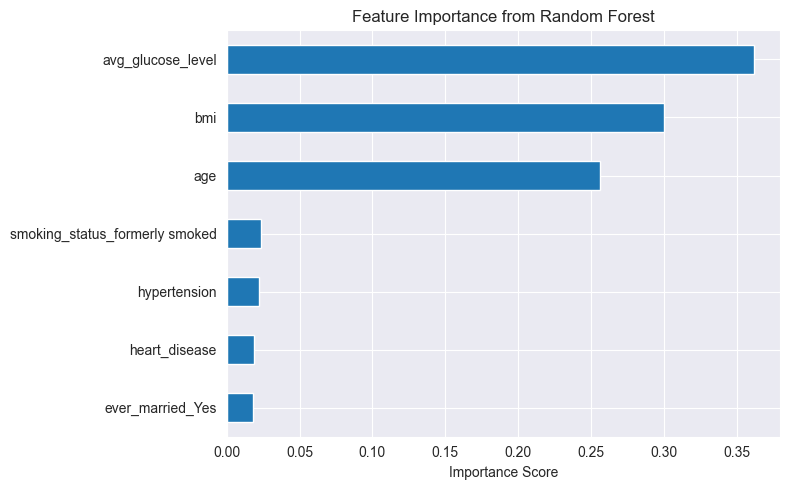

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use the same selected features
X = df[selected_features]
y = df['stroke']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("🌲 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(rf_model.feature_importances_, index=selected_features)
feature_importance.sort_values().plot(kind='barh', figsize=(8, 5))
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


# 5 KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# KNN pipeline with scaling (KNN is sensitive to feature scales)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluation
print("📘 KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


📘 KNN Accuracy: 0.9532497149372862
Confusion Matrix:
 [[836   5]
 [ 36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       841
           1       0.00      0.00      0.00        36

    accuracy                           0.95       877
   macro avg       0.48      0.50      0.49       877
weighted avg       0.92      0.95      0.94       877



The KNN model achieved a test set accuracy of 95.32%, closely matching Random Forest performance in terms of overall correctness. However, as with previous models, the KNN algorithm failed to identify any of the actual stroke cases:

Precision (stroke class): 0.00

Recall (stroke class): 0.00

F1-Score (stroke class): 0.00

This highlights the complete failure in classifying positive stroke cases, making the model highly biased toward the majority class.

In [54]:
#####################################################################################################################################################################

# Conclusion

This project set out to investigate and predict stroke risk using a real-world healthcare dataset, applying a combination of exploratory data analysis (EDA), statistical testing, and machine learning models. Through this process, we were able to extract significant insights into how various factors—demographic, clinical, and behavioral—correlate with stroke occurrence, and where traditional models struggle in highly imbalanced medical datasets.

## Key Insights from EDA

The EDA phase played a critical role in understanding the data before any modeling. Age stood out as the single most influential factor, with stroke cases heavily concentrated among patients above 60 years old. This was backed by statistical tests (t-test and CDF plots), showing a stark contrast between stroke and non-stroke distributions.

Similarly, patients with elevated glucose levels and higher BMI were more likely to have had a stroke. In particular, glucose levels showed a right-skewed distribution among stroke cases, suggesting a link with metabolic conditions such as diabetes.

Categorical variables like hypertension, heart disease, marital status, and smoking history also demonstrated significant associations with stroke, as confirmed by chi-square tests. Visualizations such as mosaic plots and subgroup analysis (e.g., age × hypertension cross-tabulations) helped uncover interaction effects that might be overlooked in isolated feature inspection.

Importantly, EDA also revealed the imbalanced nature of the dataset, where stroke cases represented only 3.7% of the total population. This imbalance informed our understanding of why certain models performed poorly on minority class prediction despite high accuracy.

## Modeling Reflections

Two primary models were implemented: logistic regression and a decision tree classifier.

The logistic regression model achieved an overall accuracy of 95.9%. However, it failed to predict a single stroke case, assigning all predictions to the majority class (non-stroke). Although the accuracy appeared high, the recall for stroke was zero, indicating the model’s inability to capture minority class signals. The model coefficients did align with EDA findings—age, glucose, hypertension, and marital status emerged as key predictors.

A decision tree was also trained using selected features and a limited depth to maintain interpretability. While the tree mirrored logical human decision paths (splitting first on age), it too predicted no stroke cases in the test set. The visualization confirmed that the model’s structure reflected medically sensible patterns, but again, the class imbalance prevented it from capturing rare events effectively.

These findings emphasize a core truth in healthcare machine learning: accuracy is not enough. Models must be evaluated on their ability to detect rare, high-impact outcomes like strokes—requiring more sensitive metrics (recall, F1-score), and techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weighting to combat imbalance.

## Custom Risk Scoring

To further support interpretability, a manual risk score was created using a linear combination of age, glucose, and BMI. This score visually separated stroke and non-stroke cases effectively in a KDE plot, confirming the strength of these features as risk indicators. Although simplistic, such scores can be highly useful in real-world screening tools where interpretability is critical.

## Project Limitations

While the analysis offered deep insights, it also faced several limitations:

Class imbalance significantly reduced the effectiveness of standard classifiers.

The dataset lacked temporal or longitudinal data (e.g., glucose trends over time), which could be valuable for early detection.

Some categories (like gender = "Other" or work type = "Never worked") had very few observations, making conclusions unreliable for those subgroups.

